In [1]:
from __future__ import division
import numpy as np
import corner

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib as mpl

from matplotlib import rcParams
rcParams["font.size"] = 16
rcParams["font.family"] = "serif"
rcParams["axes.labelsize"] = 25
mpl.rcParams['text.usetex'] = True


In [2]:
Msun = 1.9885469549614615*10**30
G = 6.67408*10**(-11)
cc = 299792458

def Mjfinal220(omega220,tau220):
    
    jf=1-pow((omega220*tau220/2.-0.7)/(1.4187),-1/0.4990)
    Mf=((1.5251 - 1.1568*pow((1 - jf),0.1292))/omega220)*(cc*cc*cc/G/Msun)

    return Mf,jf


In [3]:
def omegaQNMGR(Mf,af):
    
    omegaGR=(1.5251 - 1.1568*pow((1 - af),0.1292))/(Mf*Msun*G/cc**2/cc)
    tauGR=1/((1/2)*(omegaGR/(0.7000 + 1.4187*pow((1 - af),-0.4990))))

    return omegaGR,tauGR

In [14]:
params=['reomegaqnm_a','imomegaqnm_a','reomegaqnm_b','imomegaqnm_b','mf']
data=np.genfromtxt('/Users/richardbrito/Desktop/Projects/IMR-QNM/data/GW150914/lalinferencemcmc/EOBNRv2HMpseudoFourPN/1126259462.43-190276/H1L1/posterior_samples.dat', names=True)

XEOBv2 = data[params]

paramsLVC=['mf','af']
dataLVCsamples=np.genfromtxt('/Users/richardbrito/Desktop/Projects/IMR-QNM/data/GW150914/overall_post.dat', names=True)
XLVC = dataLVCsamples[paramsLVC]

In [15]:
MJ=Mjfinal220(XEOBv2['reomegaqnm_a']/(XEOBv2['mf']*Msun*G/(cc**2)/cc),
           XEOBv2['mf']*Msun*G/(cc**2)/cc/XEOBv2['imomegaqnm_a'])

/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


In [16]:
qnmmodes = np.vstack([MJ[0][(MJ[1]>0) & (MJ[1]<1)],
                      MJ[1][(MJ[1]>0) & (MJ[1]<1)]])

IMR = np.vstack([XLVC['mf'],XLVC['af']])


/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


/Users/richardbrito/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


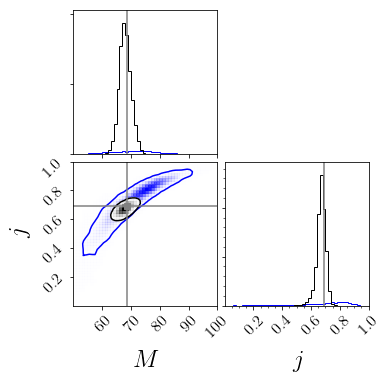

In [17]:
fig = corner.corner(np.transpose(qnmmodes),
                    labels=[r'$M$',
                            r'$j$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.9]),
                    truths=[68.5,0.69],range=([50,100],[0,1]),plot_datapoints=False)

corner.corner(np.transpose(IMR),
                    labels=[r'$M$',
                            r'$j$'],
                    smooth=True,color='black',bins=50,
                    plot_contours=True,levels=([0.9]),
                    range=([50,100],[0,1]),plot_datapoints=False,fig=fig)



plt.minorticks_on()

fig.show()

## S190521

In [28]:
params=['domega220','dtauinv220','mf','af']
paramsGR=['mf','af']

data=np.genfromtxt('/Users/richardbrito/Desktop/Projects/IMR-QNM/data/samples_pSEOB_s190521g.dat', names=True)
dataGR=np.genfromtxt('/Users/richardbrito/Desktop/Projects/IMR-QNM/data/samples_SEOB_GR_s190521g.dat', names=True)

XSEOBv4 = data[params]
XSEOBv4GR = dataGR[paramsGR]

In [29]:
omegaGR0=omegaQNMGR(XSEOBv4['mf'],XSEOBv4['af'])[0]
tauGR0=omegaQNMGR(XSEOBv4['mf'],XSEOBv4['af'])[1]

In [30]:
MJ=Mjfinal220(omegaGR0*(1+XSEOBv4['domega220']),
           tauGR0*(1+XSEOBv4['dtauinv220']))

/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


In [31]:
qnmmodes = np.vstack([MJ[0][(MJ[1]>0) & (MJ[1]<1)],
                      MJ[1][(MJ[1]>0) & (MJ[1]<1)]])

IMR = np.vstack([XSEOBv4['mf'],XSEOBv4['af']])
IMRGR = np.vstack([XSEOBv4GR['mf'],XSEOBv4GR['af']])


/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/Users/richardbrito/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


/Users/richardbrito/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


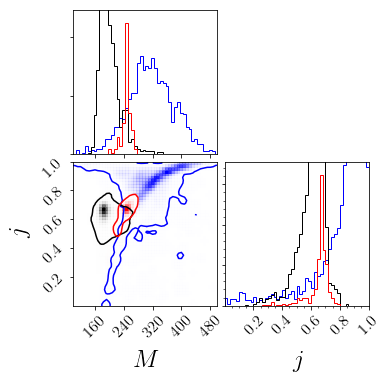

In [33]:
fig = corner.corner(np.transpose(qnmmodes),
                    labels=[r'$M$',
                            r'$j$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.9]),range=([100,500],[0,1]),plot_datapoints=False)

corner.corner(np.transpose(IMR),
                    labels=[r'$M$',
                            r'$j$'],
                    smooth=True,color='black',bins=50,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=False,range=([100,500],[0,1]),fig=fig)


corner.corner(np.transpose(IMRGR),
                    labels=[r'$M$',
                            r'$j$'],
                    smooth=True,color='red',bins=50,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=False,range=([100,500],[0,1]),fig=fig)


plt.minorticks_on()

fig.show()

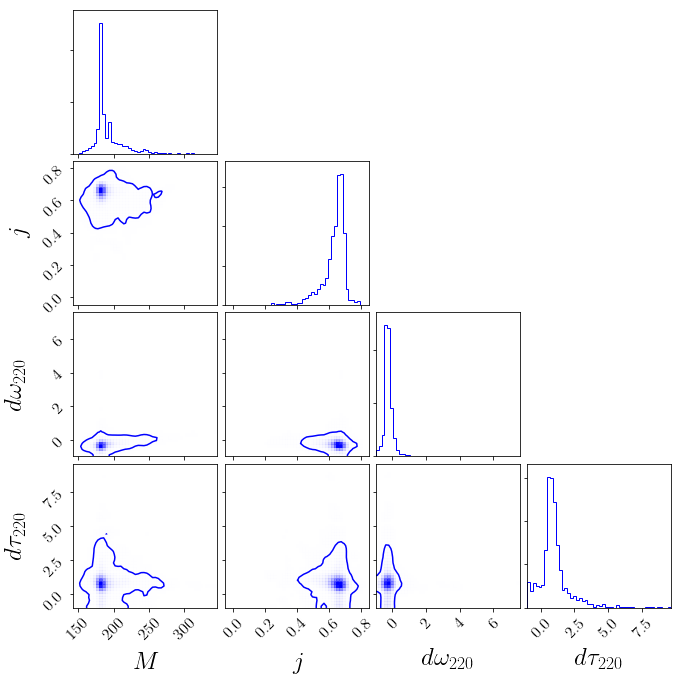

In [24]:
IMR = np.vstack([XSEOBv4['mf'],XSEOBv4['af'],XSEOBv4['domega220'],XSEOBv4['dtauinv220']])

corner.corner(np.transpose(IMR),
                    labels=[r'$M$',
                            r'$j$',r'$d\omega_{220}$',r'$d\tau_{220}$'],
                    smooth=True,color='blue',truth_color='grey',bins=50,
                    plot_contours=True,levels=([0.9]),
                    plot_datapoints=False)
plt.show()